# Equations différentielles

Un certain nombre d'équations différentielles sont vues en classe, les équations du type $y'=ay+b$, que l'on sait résoudre de manière exacte.

Cependant, un certain nombre d'équations différentielles, bien plus complexes, peuvent exister, et il est plus ou moins difficile de connaitre leurs solutions (comme des équations de mécanique des fluides, de dynamique économique, de biologie, etc.).

Cependant, il est possible d'en trouver des solutions approximatives, en simulant avec un ordinateur leur comportement. Plusieurs algorithmes existent, le plus simple est celui de la méthode d'Euler.

Pour cela, prenons l'équation $y'=f(x,y)$. L'idée est la suivante:
- Nous commençons à des conditions initiales $(0,y_0)$.
- Ensuite, estimons la valeur de $y$ à un $h$ arbitrairement petit. On connait $y'(x)=f(x,y)$, supposons alors que $y'$ ne change pas entre $x$ et $x + h$ (ce qui s'avère être vrai lorsque $h$ tend vers 0), alors $y(x+h) = y(x) + h \cdot f(x,y)$.
- On répète ainsi, petit pas par petit pas, pour estimer l'évolution de $y$.

In [3]:
def euler(f, y_0, x_final, h=0.001):
    """Renvoie s(x_final), avec s la solution à y'=f(x_final,y) et s(0)=y_0.

    f: Fonction prenant x_final et y(x_final) et renvoyant y'(x_final)
    y_0: Condition initiale
    x_final: Valeur dont on cherche s(x_final)
    h: Pas de la méthode, aussi petit que possible
    """
    x, y = 0, y_0
    # Permet de trouver y(x_final)  même si x_final < 0
    if x_final > 0:
        while x < x_final:
            y += h * f(x, y)
            x += h
    else:
        while x > x_final:
            y -= h * f(x, y)
            x -= h
    return y

On peut alors chercher les solutions à diverses équations différentielles, même assez tordues !

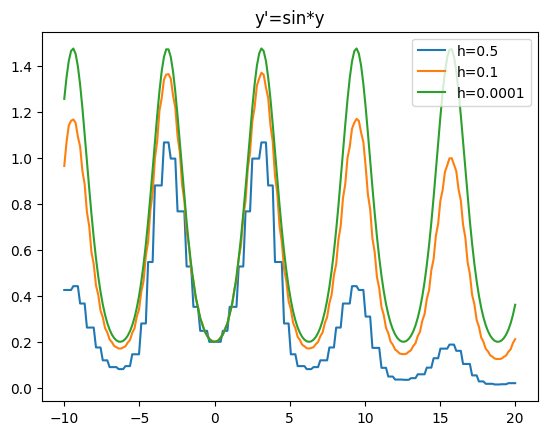

In [43]:
from math import sin
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    return sin(x)*y

abscisse = np.linspace(-10, 20, 200)
ord_1 = [euler(f, 0.2, x, h=0.5) for x in abscisse]
ord_2 = [euler(f, 0.2, x, h=0.1) for x in abscisse]
ord_3 = [euler(f, 0.2, x, h=0.0001) for x in abscisse]

plt.plot(abscisse, ord_1, label="h=0.5")
plt.plot(abscisse, ord_2, label="h=0.1")
plt.plot(abscisse, ord_3, label="h=0.0001")
plt.title("y'=sin*y")
plt.legend()